<a href="https://colab.research.google.com/github/YashMajithia/NFL-Big-Data-Bowl-2025/blob/main/NFL_Big_Data_Bowl_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NFL Pre-Snap to Post-Snap Prediction Project

This project leverages NFL tracking and play data to generate actionable insights about pre-snap team tendencies and predict play types (run vs. pass). The analysis focuses on Week 1 data and includes the following components:

- **Data Loading & Merging:** Import multiple CSV files and merge them to obtain a unified dataset.
- **Feature Engineering:** Extract pre-snap metrics (average speed, acceleration, and distance) from player tracking data.
- **Predictive Modeling:** Build a logistic regression model to classify plays as run or pass.
- **Team-Wise Analysis:** Analyze team-specific data by filtering based on the possession team, and visualize play type distributions, pre-snap metrics, and offensive formations.

## Data Sources

The project uses the following CSV files:

- **`games.csv`**  
  Contains game-level information such as gameId, season, week, gameDate, and final scores.

- **`player_play.csv`**  
  Contains play-level details for individual players including rushing and passing statistics, tackles, and other in-game events.

- **`players.csv`**  
  Contains player information like nflId, height, weight, birthDate, collegeName, position, and displayName.

- **`plays.csv`**  
  Contains play details such as gameId, playId, playDescription, down, yardsToGo, offenseFormation, and more.

- **`week1.csv`**  
  Contains player tracking data for Week 1 including gameId, playId, nflId, frame details, time, x/y coordinates, speed (`s`), acceleration (`a`), and distance (`dis`).

## Project Workflow

### 1. Data Loading & Merging

- Load the CSV files using `pandas`.
- Merge `plays.csv` with `games.csv` to obtain the week information.
- Filter the merged dataset to include only Week 1 plays.

### 2. Feature Engineering

- **Pre-Snap Filtering:**  
  Exclude tracking data where the event is `"ball_snap"` to isolate pre-snap player movements.

- **Aggregated Metrics:**  
  Group the pre-snap tracking data by `gameId` and `playId` to compute:
  - **Average Speed (`avg_speed`)**
  - **Average Acceleration (`avg_acceleration`)**
  - **Average Distance (`avg_distance`)**

### 3. Merging & Target Variable Creation

- Merge the aggregated tracking features with the Week 1 plays data.
- Create a binary target variable `play_target` based on the `isDropback` field:
  - `1` indicates a pass play (dropback).
  - `0` indicates a run play.

### 4. Predictive Modeling

- **Feature Matrix:**  
  Use the aggregated pre-snap metrics and one-hot encoded offensive formations as predictors.

- **Model Training:**  
  Split the data into training and testing sets. Train a logistic regression model to predict whether a play is a run or a pass.

- **Model Evaluation:**  
  Calculate accuracy and visualize the confusion matrix.

### 5. Team-Wise Analysis

- **Team Selection:**  
  List available teams based on the `possessionTeam` field and allow the user to select one for detailed analysis.

- **Visualizations:**  
  For the selected team:
  - Plot the play type distribution (run vs. pass).
  - Display summary statistics for pre-snap metrics.
  - Visualize the distribution of offensive formations.

## How to Run the Project

1. **Setup:**
   - Ensure you have Python 3.x installed.
   - Install the required packages using:
     ```bash
     pip install pandas numpy matplotlib seaborn scikit-learn
     ```

2. **Place the Data:**
   - Make sure the following CSV files are in your working directory:
     - `games.csv`
     - `player_play.csv`
     - `players.csv`
     - `plays.csv`
     - `week1.csv`

3. **Run the Script:**
   - Execute the Python script (e.g., `nfl_analysis.py`) using:
     ```bash
     python nfl_analysis.py
     ```

4. **Team-Wise Analysis:**
   - When prompted, enter the possession team abbreviation to view team-specific insights.

## Code Overview

Below is a high-level outline of the project code structure:

```python
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Section 1: Data Loading
# - Load CSV files and merge plays with games to filter for Week 1

# Section 2: Feature Engineering
# - Filter pre-snap tracking data (exclude 'ball_snap' events)
# - Group by gameId and playId to compute avg_speed, avg_acceleration, avg_distance

# Section 3: Merge and Target Creation
# - Merge aggregated metrics with plays data
# - Create play_target based on isDropback (pass vs. run)

# Section 4: Predictive Modeling
# - Prepare feature matrix (including one-hot encoding of offenseFormation)
# - Train a logistic regression model and evaluate accuracy
# - Plot confusion matrix

# Section 5: Team-Wise Analysis
# - List teams and prompt user to select a team
# - Filter data for the selected team and visualize play type distribution,
#   pre-snap metrics, and offensive formation distribution


In [ ]:
!wget https://www.dropbox.com/scl/fi/d2nbckedtb4q7sqhp3lag/nfl-big-data-bowl-2025.zip?rlkey=z4fkb4fk9jm630m9m96xwux04&st=ftfjllzj&dl=1.zip

--2025-03-09 15:01:31--  https://www.dropbox.com/scl/fi/d2nbckedtb4q7sqhp3lag/nfl-big-data-bowl-2025.zip?rlkey=z4fkb4fk9jm630m9m96xwux04
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uca16e4e35c519c835a763f46d61.dl.dropboxusercontent.com/cd/0/inline/CljH-z9jn2nofSsTBKg5Ojq8paKWMNWixQ-MIUE2cF-KcvjKubE9A4uxvGby9YQOWuk_SK_90T0oBQt0xgYTlByGTJzwIpdEQh-_csFX__yy0RPz3SXJ8yoTtQ30TwRLe2TByF2E7oVmN1P7syyYohcF/file# [following]
--2025-03-09 15:01:32--  https://uca16e4e35c519c835a763f46d61.dl.dropboxusercontent.com/cd/0/inline/CljH-z9jn2nofSsTBKg5Ojq8paKWMNWixQ-MIUE2cF-KcvjKubE9A4uxvGby9YQOWuk_SK_90T0oBQt0xgYTlByGTJzwIpdEQh-_csFX__yy0RPz3SXJ8yoTtQ30TwRLe2TByF2E7oVmN1P7syyYohcF/file
Resolving uca16e4e35c519c835a763f46d61.dl.dropboxusercontent.com (uca16e4e35c519c835a763f46d61.dl.dropboxusercontent.com)... 162.12

In [ ]:
!unzip nfl-big-data-bowl-2025.zip\?rlkey\=z4fkb4fk9jm630m9m96xwux04

Archive:  nfl-big-data-bowl-2025.zip?rlkey=z4fkb4fk9jm630m9m96xwux04
   creating: nfl-big-data-bowl-2025/
  inflating: nfl-big-data-bowl-2025/games.csv  
  inflating: nfl-big-data-bowl-2025/players.csv  
  inflating: nfl-big-data-bowl-2025/player_play.csv  
  inflating: nfl-big-data-bowl-2025/plays.csv  
  inflating: nfl-big-data-bowl-2025/tracking_week_1.csv  
  inflating: nfl-big-data-bowl-2025/tracking_week_2.csv  
  inflating: nfl-big-data-bowl-2025/tracking_week_3.csv  
  inflating: nfl-big-data-bowl-2025/tracking_week_4.csv  
  inflating: nfl-big-data-bowl-2025/tracking_week_5.csv  
  inflating: nfl-big-data-bowl-2025/tracking_week_6.csv  
  inflating: nfl-big-data-bowl-2025/tracking_week_7.csv  
  inflating: nfl-big-data-bowl-2025/tracking_week_8.csv  
  inflating: nfl-big-data-bowl-2025/tracking_week_9.csv  


In [ ]:
!ls

 nfl-big-data-bowl-2025  'nfl-big-data-bowl-2025.zip?rlkey=z4fkb4fk9jm630m9m96xwux04'   sample_data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#Data loading
def load_data():
  games = pd.read_csv('/content/nfl-big-data-bowl-2025/games.csv')
  players = pd.read_csv('/content/nfl-big-data-bowl-2025/players.csv')
  plays = pd.read_csv('/content/nfl-big-data-bowl-2025/plays.csv')
  player_play = pd.read_csv('/content/nfl-big-data-bowl-2025/player_play.csv')
  week1 = pd.read_csv('/content/nfl-big-data-bowl-2025/tracking_week_1.csv')
  return games, players, plays, player_play, week1

games,players,plays,player_play,week1 = load_data()

plays = plays.merge(games[['gameId','week']], on='gameId', how='left')
plays_week1 = plays[plays['week'] == 1].copy()

print('Sample plays data (week 1):')
print(plays_week1.head())

Sample plays data (week 1):
        gameId  playId                                    playDescription  \
8   2022091104    3662  (12:51) (Shotgun) J.Hurts pass incomplete shor...   
12  2022091112    1674  (:35) (Shotgun) A.Rodgers pass deep left inten...   
22  2022091111     923  (11:59) J.Herbert pass deep right to K.Allen t...   
26  2022091109    3544  (11:04) (Shotgun) C.Wentz pass short right to ...   
29  2022091109    2502  (8:54) C.Van Lanen reported in as eligible.  T...   

    quarter  down  yardsToGo possessionTeam defensiveTeam yardlineSide  \
8         4     3         12            PHI           DET          PHI   
12        2     1         10             GB           MIN           GB   
22        2     1         10            LAC            LV          LAC   
26        4     2          7            WAS           JAX          WAS   
29        3     2          3            JAX           WAS          WAS   

    yardlineNumber  ... homeTeamWinProbabilityAdded  \
8        

In [ ]:
#Feature engineering from tracking data
pre_snap_tracking = week1[week1['event'] != 'ball_snap']

agg_features = pre_snap_tracking.groupby(['gameId', 'playId', 'nflId']).agg({
    's': 'mean',
    'a': 'mean',
    'dis': 'mean'
}).reset_index()

agg_features.rename(columns = {
    's' : 'avg_speed',
    'a' : 'avg_acceleration',
    'dis' : 'avg_distance'
}, inplace = True)

print("\nAggregated pre snap features:")
print(agg_features.head())


Aggregated pre snap features:
       gameId  playId    nflId  avg_speed  avg_acceleration  avg_distance
0  2022090800      56  35472.0   0.486597          0.435131      0.050576
1  2022090800      56  38577.0   0.737277          0.794084      0.074188
2  2022090800      56  41239.0   0.913194          0.724136      0.095393
3  2022090800      56  42392.0   0.496806          0.385288      0.053717
4  2022090800      56  42489.0   2.279005          1.429738      0.228429


In [ ]:
#Managing and creating the target variable
plays_feature = plays_week1.merge(agg_features, on=['gameId','playId'], how='left')

plays_feature['play_target'] = plays_feature['isDropback'].apply(
    lambda x: 1 if (x == 1 or x is True) else 0
)

print("\nPlays with pre-snap features and target variable:")
print(plays_feature[['gameId', 'playId', 'possessionTeam', 'offenseFormation',
                      'avg_speed', 'avg_acceleration', 'avg_distance', 'play_target']].head())


Plays with pre-snap features and target variable:
       gameId  playId possessionTeam offenseFormation  avg_speed  \
0  2022091104    3662            PHI          SHOTGUN   0.766154   
1  2022091104    3662            PHI          SHOTGUN   0.921923   
2  2022091104    3662            PHI          SHOTGUN   0.602000   
3  2022091104    3662            PHI          SHOTGUN   0.710231   
4  2022091104    3662            PHI          SHOTGUN   0.736077   

   avg_acceleration  avg_distance  play_target  
0          0.472000      0.080077            1  
1          0.610615      0.096000            1  
2          0.515154      0.062769            1  
3          0.914538      0.071538            1  
4          0.917615      0.074923            1  



Model Accuracy: 0.74


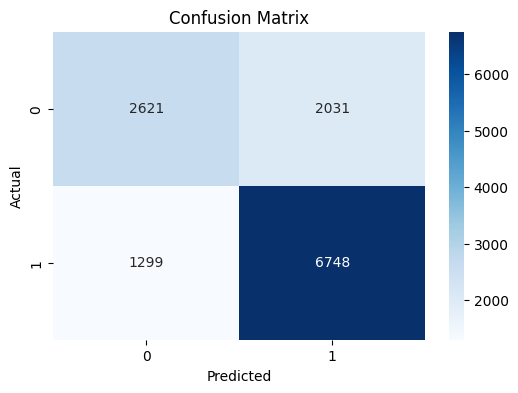

In [ ]:
#Predictive modelling (Run vs Pass)
features = ['avg_speed', 'avg_acceleration', 'avg_distance']

model_data = plays_feature.dropna(subset=features+['offenseFormation','play_target']).copy()

formation_dummies = pd.get_dummies(model_data['offenseFormation'], prefix='offenseFormation')
X = pd.concat([model_data[features], formation_dummies], axis=1)
y = model_data['play_target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy: {:.2f}".format(accuracy))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Available Teams (possessionTeam): ['PHI' 'GB' 'LAC' 'WAS' 'JAX' 'BAL' 'IND' 'DET' 'CAR' 'MIA' 'LV' 'KC'
 'NYJ' 'DAL' 'NO' 'CHI' 'ARI' 'PIT' 'TB' 'CLE' 'NYG' 'TEN' 'CIN' 'SEA'
 'HOU' 'NE' 'BUF' 'LA' 'SF' 'ATL' 'DEN' 'MIN']
Enter the possession team abbreviation for analysis: PHI

Analysis for Team: PHI
Sample Data for the Selected Team:
       gameId  playId                                    playDescription  \
0  2022091104    3662  (12:51) (Shotgun) J.Hurts pass incomplete shor...   
1  2022091104    3662  (12:51) (Shotgun) J.Hurts pass incomplete shor...   
2  2022091104    3662  (12:51) (Shotgun) J.Hurts pass incomplete shor...   
3  2022091104    3662  (12:51) (Shotgun) J.Hurts pass incomplete shor...   
4  2022091104    3662  (12:51) (Shotgun) J.Hurts pass incomplete shor...   

   quarter  down  yardsToGo possessionTeam defensiveTeam yardlineSide  \
0        4     3         12            PHI           DET          PHI   
1        4     3         12            PHI           DET  

<ipython-input-17-43913a1330d9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_play_distribution.index, y=team_play_distribution.values, palette="viridis")


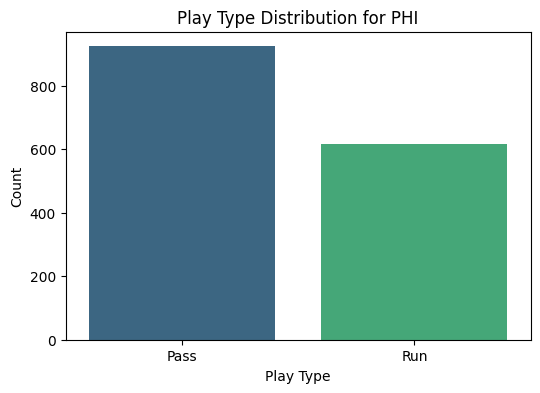


Pre-snap Metrics Summary for the Selected Team:
      avg_speed  avg_acceleration  avg_distance
mean   1.180986          0.861035      0.120152
std    0.569683          0.335389      0.056489

Offensive Formation Distribution for the Selected Team:
offenseFormation
SHOTGUN       1276
PISTOL          88
EMPTY           88
I_FORM          22
SINGLEBACK      22
JUMBO           22
Name: count, dtype: int64


<ipython-input-17-43913a1330d9>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=formation_counts.index, y=formation_counts.values, palette="rocket")


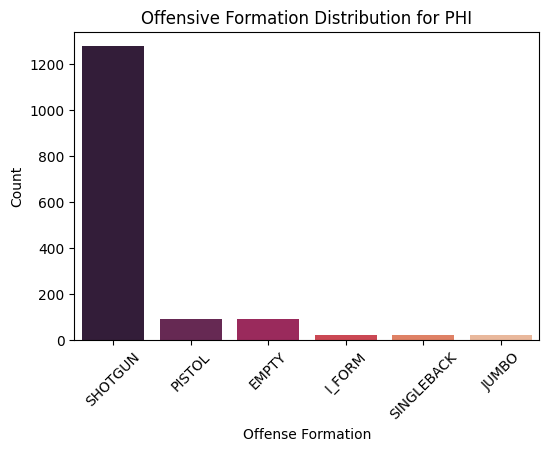

In [ ]:
#Team wise analysis
teams = plays_feature['possessionTeam'].unique()
print("\nAvailable Teams (possessionTeam):", teams)

# Let user select a team via console input
selected_team = input("Enter the possession team abbreviation for analysis: ")


team_data = plays_feature[plays_feature['possessionTeam'] == selected_team]

print(f"\nAnalysis for Team: {selected_team}")
print("Sample Data for the Selected Team:")
print(team_data.head())


team_play_distribution = team_data['play_target'].value_counts().rename(index={0: "Run", 1: "Pass"})
print("\nPlay Type Distribution:")
print(team_play_distribution)

plt.figure(figsize=(6, 4))
sns.barplot(x=team_play_distribution.index, y=team_play_distribution.values, palette="viridis")
plt.title(f"Play Type Distribution for {selected_team}")
plt.xlabel("Play Type")
plt.ylabel("Count")
plt.show()


print("\nPre-snap Metrics Summary for the Selected Team:")
team_metrics = team_data[['avg_speed', 'avg_acceleration', 'avg_distance']].describe().loc[['mean', 'std']]
print(team_metrics)


if 'offenseFormation' in team_data.columns:
    formation_counts = team_data['offenseFormation'].value_counts()
    print("\nOffensive Formation Distribution for the Selected Team:")
    print(formation_counts)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=formation_counts.index, y=formation_counts.values, palette="rocket")
    plt.title(f"Offensive Formation Distribution for {selected_team}")
    plt.xlabel("Offense Formation")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()